Each row in the csv file represents the information from a housing block. 
Columns represent (in order): 
1) Median age of the houses in the block (in years) 
2) Total number of rooms in a given block 
3) Number of bedrooms in a given block 
4) Population in the block 
5) Number of households in the block 
6) Median household income in the block (in thousands of dollars) 
7) Proximity to the ocean (rated on a scale from 0 = closest to 4 = farthest) 
8) Median house value in the block (in dollars)

In [1]:
# Numerical/scientific computing packages.
import numpy as np
import scipy

# Machine learning package.
import sklearn

# Useful for saving our models.
import pickle

# Plotting packages.
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns

# Sets the matplotlib backend for the notebook.
# sets the backend of matplotlib to the 'inline' backend: 
# With this backend, the output of plotting commands is 
# displayed inline within the Jupyter notebook, 
# directly below the code cell that produced it
%matplotlib inline 

print('Finished successfully loading packages')


Finished successfully loading packages


## Question 1

Why  is  it  a  good  idea  to  standardize/normalize  the  predictor  variables  2  and  3  and 
why are predictor variables 4 and 5 probably not very useful by themselves to predict 
median house values in a block?

## Answer 1

The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges. In our case, let us test how predictors 2 and 3 are different from each other

In [2]:
file_path = 'housingUnits.csv'

df = pd.read_csv(file_path)

In [3]:
df.columns.values.tolist()

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'ocean_proximity',
 'median_house_value']

In [4]:
total_rooms = "total_rooms"
total_bedrooms = "total_bedrooms"

In [5]:
total_rooms_mean = df[total_rooms].mean()
total_rooms_std = df[total_rooms].std()

In [6]:
total_bedrooms_mean = df[total_bedrooms].mean()
total_bedrooms_std = df[total_bedrooms].std()

In [7]:
print(f"Mean of '{total_rooms}': {total_rooms_mean}")
print(f"Standard deviation of '{total_rooms}': {total_rooms_std}")

Mean of 'total_rooms': 2635.7630813953488
Standard deviation of 'total_rooms': 2181.615251582795


In [8]:
print(f"Mean of '{total_bedrooms}': {total_bedrooms_mean}")
print(f"Standard deviation of '{total_bedrooms}': {total_bedrooms_std}")

Mean of 'total_bedrooms': 537.7352713178294
Standard deviation of 'total_bedrooms': 391.3929133157033


In [9]:
data_size = df.shape[0]

In [10]:
data_size

20640

In [11]:
def plot_freq_dist(data: pd.DataFrame):
    """
    data: 1d dataframe to plot on the graph
    """
    data_size = data.shape[0]
    # Let's use the Scott's rule for choosing the right bin width
    w = 3.49 * np.std(data)/data_size**(1./3)

    # color of the histogram
    color = 'black'

    # define bins with accordance to the appropriate size 
    bins = np.arange(data.min().item(), data.max().item() + w, w, dtype=float)
    
    plot = plt.hist(data, edgecolor=color, bins=bins) 
    return plot

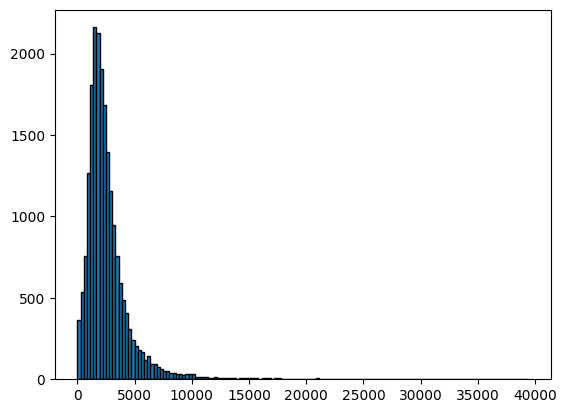

In [12]:
total_rooms_plot = plot_freq_dist(df[total_rooms])

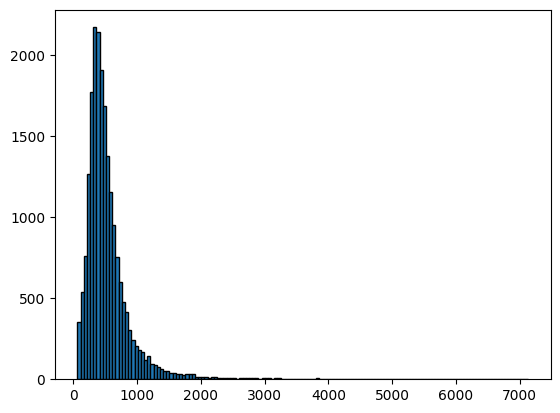

In [13]:
total_bedrooms_plot = plot_freq_dist(df[total_bedrooms])

Although the distributions of the `total_bedrooms` and `total_rooms` look very similar, we might need to normalize these 2 predictors as their ranges differ from each other significantly

In [14]:
def normalize(arr, range_to_normalize=(0, 1)):
    t_min, t_max = range_to_normalize
    
    # Convert the input array to a NumPy array for efficient operations
    arr = np.array(arr)
    
    # Calculate the range of the input array
    arr_min, arr_max = arr.min(), arr.max()
    
    # Use NumPy operations for vectorized normalization
    norm_arr = ((arr - arr_min) / (arr_max - arr_min)) * (t_max - t_min) + t_min
    
    # Convert the result back to a DataFrame
    return pd.DataFrame(norm_arr)

In [15]:
normalized_total_rooms = normalize(df[total_rooms])

In [16]:
normalized_total_bedrooms = normalize(df[total_bedrooms])

In [17]:
normalized_plot_total_rooms = plot_freq_dist(normalized_total_rooms)

/Users/yan/machine_learning_spring2024/.venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().